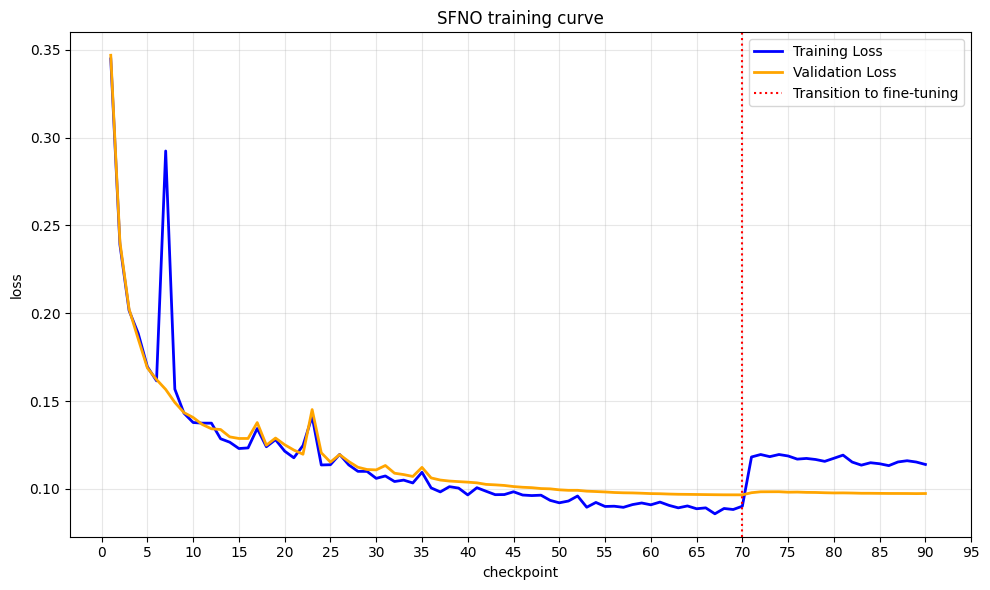

In [1]:
import re
import matplotlib.pyplot as plt

def parse_log(file_path, epoch_offset=0):
    epochs = []
    train_loss = []
    val_loss = []
    
    with open(file_path, 'r') as f:
        content = f.read()
        
        # Find all "Epoch X summary" blocks
        # This regex looks for the epoch number, then skips down to find training and validation loss
        pattern = re.compile(
            r"Epoch (\d+) summary:.*?training loss:\s+([\d.]+).*?validation loss:\s+([\d.]+)", 
            re.DOTALL
        )
        
        matches = pattern.findall(content)
        for m in matches:
            epochs.append(int(m[0]) + epoch_offset)
            train_loss.append(float(m[1]))
            val_loss.append(float(m[2]))
            
    return epochs, train_loss, val_loss

# Parse the first log (Epochs 1-70)
log1 = "/projectnb/eb-general/shared_data/data/processed/FourCastNet_sfno/Checkpoints_SFNO/sfno_linear_74chq_sc3_layers8_edim384_dt6h_wstgl2/v0.1.0-seed999/out.log"
e1, t1, v1 = parse_log(log1)

# Parse the second log (multistep fine-tuning, starts from 70)
log2 = "/projectnb/eb-general/shared_data/data/processed/FourCastNet_sfno/Checkpoints_SFNO/multistep_sfno_linear_74chq_sc3_layers8_edim384_dt6h_wstgl2/v0.1.0-seed999-multistep2/out.log"
# We add an offset of 70 because the log resets to 1 but represents continuation
e2, t2, v2 = parse_log(log2, epoch_offset=70)

# Combine datasets
all_epochs = e1 + e2
all_train = t1 + t2
all_val = v1 + v2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(all_epochs, all_train, label='Training Loss', color='blue', linewidth=2)
plt.plot(all_epochs, all_val, label='Validation Loss', color='orange', linewidth=2)

# Mark the transition to multistep training
plt.axvline(x=70, color='red', linestyle=':', label='Transition to fine-tuning')

plt.xlabel('checkpoint')
plt.xticks(range(0, max(all_epochs)+10, 5))
plt.ylabel('loss')
# plt.yscale('log')
plt.title('SFNO training curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('sfno_training_curve.png')
plt.show()

In [2]:
# check the number of values in each list
print(f"Epochs: {len(all_epochs)}, Train Loss: {len(all_train)}, Val Loss: {len(all_val)}")


Epochs: 90, Train Loss: 90, Val Loss: 90


In [ ]:
import torch
import os

dir='/projectnb/eb-general/shared_data/data/processed/FourCastNet_sfno/Checkpoints_SFNO/sfno_linear_74chq_sc3_layers8_edim384_dt6h_wstgl2/v0.1.0-seed999/training_checkpoints/' # step 1 of training (epochs 1-70)
dir2='/projectnb/eb-general/shared_data/data/processed/FourCastNet_sfno/Checkpoints_SFNO/multistep_sfno_linear_74chq_sc3_layers8_edim384_dt6h_wstgl2/v0.1.0-seed999-multistep2/training_checkpoints/' # step 2 of training (epochs 71-90

# List of files to check
files_to_check = [dir + "best_ckpt_mp0.tar", 
                  dir + "ckpt_mp0.tar",
                  dir2 +  "best_ckpt_mp0.tar",
                    dir2 + "ckpt_mp0.tar"
                    ]
                
for filename in files_to_check:
    # Load the checkpoint
    # map_location='cpu' allows you to inspect this even without a GPU
    # weights_only=False allows loading the full dictionary structure
    checkpoint = torch.load(filename, map_location='cpu', weights_only=False)
    epoch = checkpoint.get('epoch', 'N/A')

    # print contents of checkpoint
    print(f"Contents of {filename}:")
    for key in checkpoint.keys():
        print(f"  {key}: type={type(checkpoint[key])}")

    print(checkpoint['optimizer_state_dict'].keys())
    
    # print(f'epoch: {str(epoch)}')
    print()

Contents of /projectnb/eb-general/shared_data/data/processed/FourCastNet_sfno/Checkpoints_SFNO/sfno_linear_74chq_sc3_layers8_edim384_dt6h_wstgl2/v0.1.0-seed999/training_checkpoints/best_ckpt_mp0.tar:
  iters: type=<class 'int'>
  epoch: type=<class 'int'>
  model_state: type=<class 'collections.OrderedDict'>
  optimizer_state_dict: type=<class 'dict'>
  params: type=<class 'makani.utils.YParams.YParams'>
  scheduler_state_dict: type=<class 'dict'>
dict_keys(['state', 'param_groups'])

Contents of /projectnb/eb-general/shared_data/data/processed/FourCastNet_sfno/Checkpoints_SFNO/sfno_linear_74chq_sc3_layers8_edim384_dt6h_wstgl2/v0.1.0-seed999/training_checkpoints/ckpt_mp0.tar:
  iters: type=<class 'int'>
  epoch: type=<class 'int'>
  model_state: type=<class 'collections.OrderedDict'>
  optimizer_state_dict: type=<class 'dict'>
  params: type=<class 'makani.utils.YParams.YParams'>
  scheduler_state_dict: type=<class 'dict'>
dict_keys(['state', 'param_groups'])

Contents of /projectnb/eb